# Install Dependencies 

In [1202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Load Training Dataset**

In [1203]:
training = pd.read_csv('train.csv')

In [1204]:
training.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Exploratory Analysis

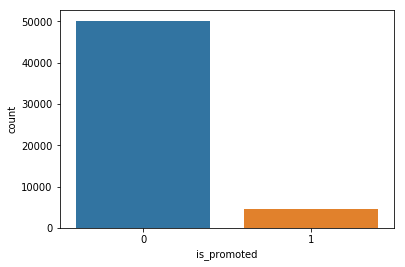

In [1205]:
sns.countplot(training['is_promoted'])

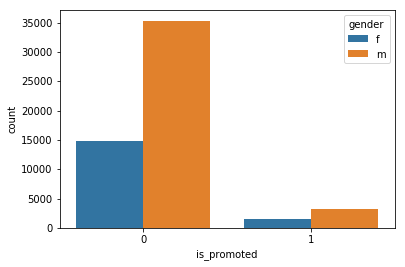

In [1206]:
sns.countplot(training['is_promoted'],hue = training['gender'])

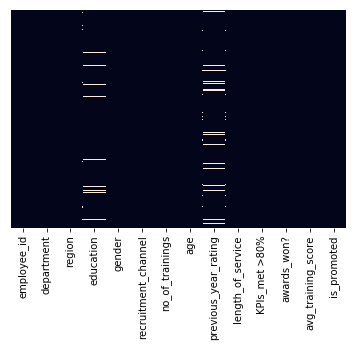

In [1207]:
sns.heatmap(training.isna(),yticklabels = False,cbar = False)

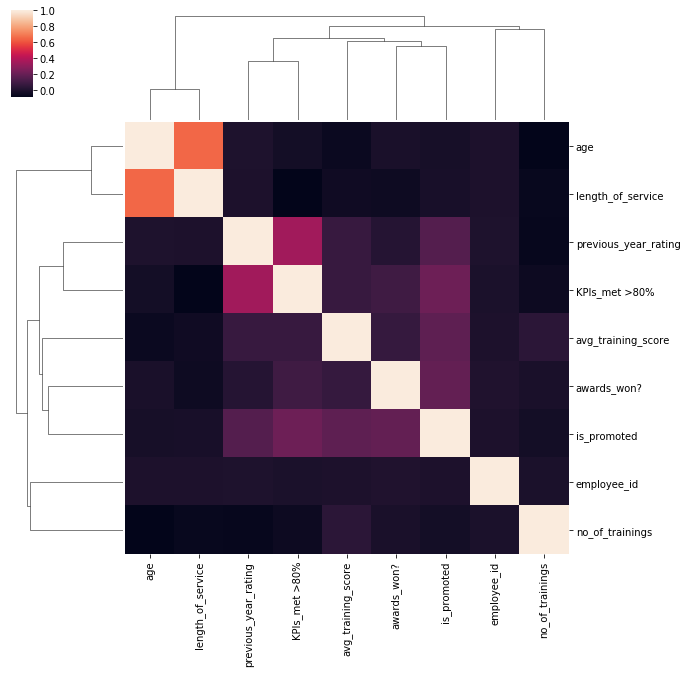

In [1208]:
sns.clustermap(training.corr())

# Data Cleaning

In [1209]:
def educ(colums):
    gender = colums[0]
    education = colums[1]
    channel = colums[2]
    age = colums[3]
    if pd.isnull(education):
        if(gender == 'm' and channel == 'sourcing'):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'sourcing'):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age <= 40 ):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age > 40):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'other' and age <= 38):
            return('Bachelor\'s')
        elif(gender == 'f' and channel == 'other' and age > 38):
            return('Master\'s & above')
        else:
            return('Bachelor\'s')
    else:
        return(education)

In [1210]:
training['education'] = training[['gender','education','recruitment_channel','age']].apply(educ,axis = 1)

In [1211]:
training['previous_year_rating'].fillna(4,inplace = True)

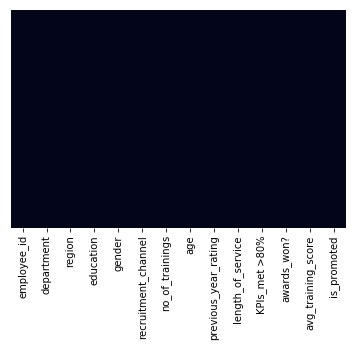

In [1212]:
sns.heatmap(training.isna(),yticklabels=False,cbar = False)

In [1213]:
Department = pd.get_dummies(training['department'])

In [1214]:
training['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [1215]:
Region = pd.get_dummies(training['region'])

In [1216]:
Region

,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1217]:
#training['region'] = training['region'].map(Region)

In [1218]:
training['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [1219]:
Education = pd.get_dummies(training['education'])

In [1220]:
Gender = pd.get_dummies(training['gender'],drop_first=True)

In [1221]:
Channel = pd.get_dummies(training['recruitment_channel'])

In [1222]:
training = pd.concat([training,Department,Education,Gender,Channel,Region],axis=1)

In [1223]:
training.drop(['gender','department','education','recruitment_channel','region'],inplace=True,axis=1)

In [1224]:
training.head(12)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Analytics,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,0,0,0
5,58896,2,31,3.0,7,0,0,85,0,1,...,0,0,0,0,0,0,0,0,0,0
6,20379,1,31,3.0,5,0,0,59,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16290,1,33,3.0,6,0,0,63,0,0,...,0,0,0,1,0,0,0,0,0,0
8,73202,1,28,4.0,5,0,0,83,0,1,...,0,0,0,0,0,0,0,0,0,0
9,28911,1,32,5.0,5,1,0,54,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1225]:
y = training['is_promoted']
x = training.drop(['is_promoted'],axis=1)

# Machine Learning Models

In [1226]:
from sklearn.model_selection import train_test_split

In [1227]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.6,random_state = 101)

**Decision Tree Classifier**

In [1228]:
from sklearn.tree import DecisionTreeClassifier

In [1229]:
dtc = DecisionTreeClassifier()

**Train Model**

In [1230]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Predictions**

In [1231]:
prediction = dtc.predict(x_test)

**Check Accuracy**

In [1232]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [1233]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[28295  1841]
 [ 1511  1238]]
             precision    recall  f1-score   support

          0       0.95      0.94      0.94     30136
          1       0.40      0.45      0.42      2749

avg / total       0.90      0.90      0.90     32885

0.898069028432416


**Random Forest Classifier**

In [1234]:
from sklearn.ensemble import RandomForestClassifier

In [1235]:
rfc = RandomForestClassifier(n_estimators=19)

**Fit Model**

In [1236]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Make Predictions**

In [1237]:
predictions = rfc.predict(x_test)

**Check Accuracy**

In [1238]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[29958   178]
 [ 2105   644]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96     30136
          1       0.78      0.23      0.36      2749

avg / total       0.92      0.93      0.91     32885

0.9305762505701688


# Actual Prediction 

**Load test File**

In [1239]:
testing = pd.read_csv('test.csv')

In [1240]:
testing.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Data Cleaning 

In [1241]:
def educ(colums):
    gender = colums[0]
    education = colums[1]
    channel = colums[2]
    age = colums[3]
    if pd.isnull(education):
        if(gender == 'm' and channel == 'sourcing'):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'sourcing'):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age <= 40 ):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age > 40):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'other' and age <= 38):
            return('Bachelor\'s')
        elif(gender == 'f' and channel == 'other' and age > 38):
            return('Master\'s & above')
        else:
            return('Bachelor\'s')
    else:
        return(education)

In [1242]:
testing['education'] = testing[['gender','education','recruitment_channel','age']].apply(educ,axis = 1)

In [1243]:
testing['previous_year_rating'].fillna(4,inplace = True)

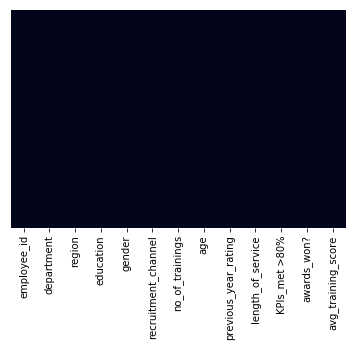

In [1244]:
sns.heatmap(testing.isna(),yticklabels=False,cbar = False)

In [1245]:
testing_Department = pd.get_dummies(testing['department'])

In [1246]:
testing_Education = pd.get_dummies(testing['education'])

In [1247]:
testing_Gender = pd.get_dummies(testing['gender'],drop_first=True)

In [1248]:
testing_Channel = pd.get_dummies(testing['recruitment_channel'])

In [1249]:
testing_Region = pd.get_dummies(testing['region'])

In [1250]:
testing = pd.concat([testing,testing_Department,testing_Channel,testing_Education,testing_Gender,testing_Region],axis=1)

In [1251]:
testing.drop(['gender','department','education','recruitment_channel','region'],inplace=True,axis=1)

In [1252]:
testing.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,8724,1,24,4.0,1,1,0,77,0,0,...,0,0,0,0,0,0,0,0,0,0
1,74430,1,31,3.0,5,0,0,51,0,0,...,0,0,0,0,1,0,0,0,0,0
2,72255,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38562,3,31,2.0,9,0,0,65,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64486,1,30,4.0,7,0,0,61,0,1,...,0,0,0,0,0,0,0,0,0,0


# Fit Model and Make Prediction 

In [1253]:
fit_y = training['is_promoted']
fit_x = training.drop(['is_promoted'],axis=1)

In [1254]:
test_x = testing

In [1255]:
dtc.fit(fit_x,fit_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1256]:
final_predictions = dtc.predict(test_x)

# Submission File 

In [1257]:
prediction_csv_file = pd.DataFrame({'employee_id' : testing['employee_id'],'is_promoted' : final_predictions})

In [1258]:
prediction_csv_file.to_csv('Submission.csv',index=False)